# Applying Linear Regression model to 'Housing prices' dataset from Kaggle!

V1_Details:
- Data splitting ratio 80:20
- Normalized the numerical columns
- Label encoded the categorical columns
- No feature engineering 

# Explore Dataset

In [1]:
import pandas as pd

path = "/kaggle/input/housing-prices-dataset/Housing.csv"
df = pd.read_csv(path)

In [2]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

# Data Preprocessing

In [4]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(list(numerical_cols))

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(list(categorical_cols))

Numerical Columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Categorical Columns:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


# Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


# Data Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0


# Define Features (X) and Target (y)

In [9]:
X = df.drop('price', axis=1)
y = df['price']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (545, 12)
y shape: (545,)


# Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 436
Testing samples: 109


# Model Training

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [12]:
y_pred = model.predict(X_test)

In [13]:
results = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

results.head(10)

,Actual Price,Predicted Price
0,0.200000,0.299021
1,0.424242,0.476797
2,0.169697,0.113665
3,0.406061,0.243255
4,0.090909,0.137050
5,0.272727,0.156977
6,0.303030,0.337270
7,0.241818,0.403808
8,0.060606,0.087085
9,0.138788,0.079562


# Model Evaluation

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.08482075249315947
Mean Squared Error (MSE): 0.01328124372927076
R² Score: 0.6494754192267789


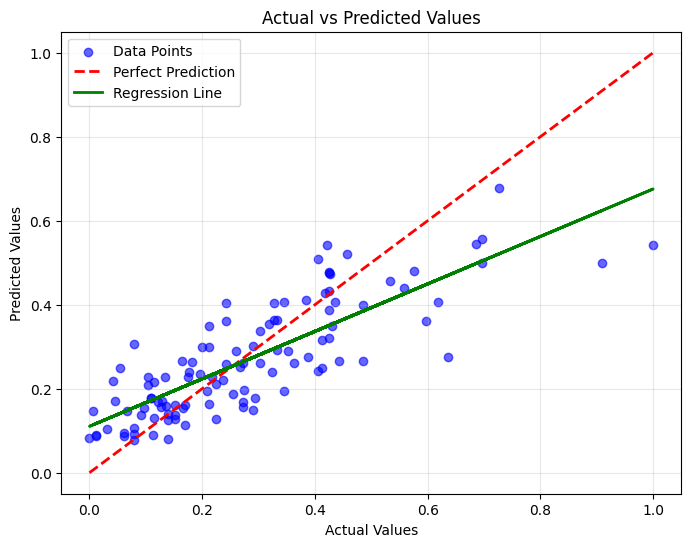

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Data Points')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "g-", lw=2, label='Regression Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()